In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score
import matplotlib.pyplot as plt

In [2]:
# Load the Default dataset
import os
os.chdir('C:\\Users\gmoor\Documents\Economic Analytics 1\Data')

raw0 = pd.read_csv('Default.csv')
raw0.dropna(inplace=True)

raw0

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [3]:
# Convert columns to dummy variables
raw0.default=(raw0.default=='Yes')*1
raw0.student=(raw0.student=='Yes')*1

raw0

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,0,0,711.555020,52992.378914
9996,9997,0,0,757.962918,19660.721768
9997,9998,0,0,845.411989,58636.156984
9998,9999,0,0,1569.009053,36669.112365


In [4]:
# Prepare features and target
X = raw0[['balance', 'income', 'student']]
y = raw0['default']

In [5]:
X

,balance,income,student
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0
...,...,...,...
9995,711.555020,52992.378914,0
9996,757.962918,19660.721768,0
9997,845.411989,58636.156984,0
9998,1569.009053,36669.112365,0


In [6]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int32

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
# Define the KNN model
knn = KNeighborsClassifier()

In [9]:
# Set up the parameter grid to search the number of neighbor
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}

param_grid

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}

In [10]:
# Define precision as the scoring metric
scorer = make_scorer(precision_score, zero_division=1)

In [11]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scorer, cv=5)

In [12]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(precision_score, zero_division=1))

In [13]:
# Get the best parameters and best precision score
best_params = grid_search.best_params_
best_precision = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Precision Score:", best_precision)

Best Parameters: {'n_neighbors': 4}
Best Precision Score: 0.6476190476190476


In [14]:
# Results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results:")
print(results[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']])


Grid Search Results:
  param_n_neighbors  mean_test_score  std_test_score  rank_test_score
0                 2         0.569238        0.237082                2
1                 3         0.463347        0.139197                6
2                 4         0.647619        0.207239                1
3                 5         0.503525        0.132536                5
4                 6         0.341270        0.178880                7
5                 7         0.532493        0.122260                4
6                 8         0.553333        0.245493                3


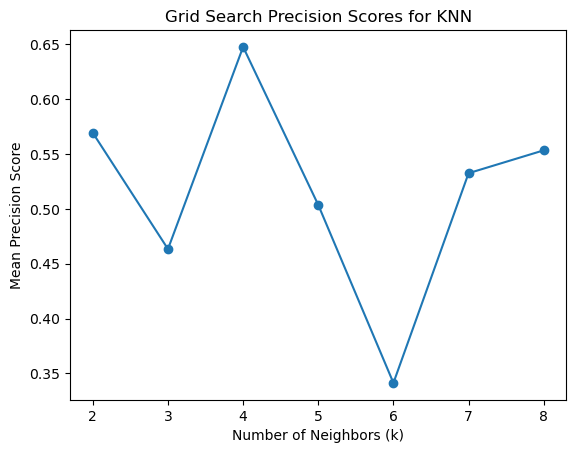

In [15]:
# Visualization of precision scores for each number of neighbors
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Precision Score")
plt.title("Grid Search Precision Scores for KNN")
plt.show()